## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [211]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import urllib.request
import bootcampviztools as bt
import funciones as fs
import seaborn as sns

## Datos

In [212]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col= 0)
df.index.name = None

## Exploración de los datos

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [214]:
fs.describe_df(df)

COL_N         Company Product TypeName   Inches ScreenResolution     Cpu  \
DATA_TYPE      object  object   object  float64           object  object   
MISSINGS (%)      0.0     0.0      0.0      0.0              0.0     0.0   
UNIQUE_VALUES      19     480        6       17               36     107   
CARDIN (%)       0.02    0.53     0.01     0.02             0.04    0.12   

COL_N             Ram  Memory     Gpu   OpSys  Weight Price_in_euros  
DATA_TYPE      object  object  object  object  object        float64  
MISSINGS (%)      0.0     0.0     0.0     0.0     0.0            0.0  
UNIQUE_VALUES       9      37      93       9     165            603  
CARDIN (%)       0.01    0.04     0.1    0.01    0.18           0.66

In [215]:
df

Company             Product            TypeName  Inches  \
755       HP              250 G6            Notebook    15.6   
618     Dell       Inspiron 7559              Gaming    15.6   
909       HP         ProBook 450            Notebook    15.6   
2      Apple         Macbook Air           Ultrabook    13.3   
286     Dell       Inspiron 3567            Notebook    15.6   
...      ...                 ...                 ...     ...   
28      Dell       Inspiron 5570            Notebook    15.6   
1160      HP         Spectre Pro  2 in 1 Convertible    13.3   
78    Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
23        HP              255 G6            Notebook    15.6   
229     Dell        Alienware 17              Gaming    17.3   

                     ScreenResolution                           Cpu   Ram  \
755                 Full HD 1920x1080      Intel Core i3 6006U 2GHz   8GB   
618                 Full HD 1920x1080   Intel Core i7 6700HQ 2.6GHz  16GB   
909                 Full HD 1920x1080    Intel Core i7 7500U 2.7GHz   8GB   
2                            1440x900          Intel Core i5 1.8GHz   8GB   
286                 Full HD 1920x1080    Intel Core i3 6006U 2.0GHz   4GB   
...                               ...                           ...   ...   
28                  Full HD 1920x1080    Intel Core i5 8250U 1.6GHz   8GB   
1160  Full HD / Touchscreen 1920x1080    Intel Core i5 6300U 2.4GHz   8GB   
78                  Full HD 1920x1080    Intel Core i5 7200U 2.5GHz   8GB   
23                           1366x768  AMD E-Series E2-9000e 1.5GHz   4GB   
229       IPS Panel Full HD 1920x1080   Intel Core i7 7700HQ 2.8GHz  16GB   

                    Memory                             Gpu       OpSys  \
755              256GB SSD           Intel HD Graphics 520  Windows 10   
618                1TB HDD  Nvidia GeForce GTX 960<U+039C>  Windows 10   
909                1TB HDD            Nvidia GeForce 930MX  Windows 10   
2      128GB Flash Storage          Intel HD Graphics 6000       macOS   
286                1TB HDD              AMD Radeon R5 M430       Linux   
...                    ...                             ...         ...   
28               256GB SSD                  AMD Radeon 530  Windows 10   
1160             256GB SSD           Intel HD Graphics 520  Windows 10   
78                 2TB HDD           Intel HD Graphics 620       No OS   
23               500GB HDD                   AMD Radeon R2       No OS   
229   256GB SSD +  1TB HDD         Nvidia GeForce GTX 1060  Windows 10   

      Weight  Price_in_euros  
755   1.86kg          539.00  
618   2.59kg          879.01  
909   2.04kg          900.00  
2     1.34kg          898.94  
286   2.25kg          428.00  
...      ...             ...  
28     2.2kg          800.00  
1160  1.48kg         1629.00  
78     2.2kg          519.00  
23    1.86kg          258.00  
229   4.42kg         2456.34  

[912 rows x 12 columns]

In [216]:
df.head()

Company        Product   TypeName  Inches   ScreenResolution  \
755      HP         250 G6   Notebook    15.6  Full HD 1920x1080   
618    Dell  Inspiron 7559     Gaming    15.6  Full HD 1920x1080   
909      HP    ProBook 450   Notebook    15.6  Full HD 1920x1080   
2     Apple    Macbook Air  Ultrabook    13.3           1440x900   
286    Dell  Inspiron 3567   Notebook    15.6  Full HD 1920x1080   

                             Cpu   Ram               Memory  \
755     Intel Core i3 6006U 2GHz   8GB            256GB SSD   
618  Intel Core i7 6700HQ 2.6GHz  16GB              1TB HDD   
909   Intel Core i7 7500U 2.7GHz   8GB              1TB HDD   
2           Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
286   Intel Core i3 6006U 2.0GHz   4GB              1TB HDD   

                                Gpu       OpSys  Weight  Price_in_euros  
755           Intel HD Graphics 520  Windows 10  1.86kg          539.00  
618  Nvidia GeForce GTX 960<U+039C>  Windows 10  2.59kg          879.01  
909            Nvidia GeForce 930MX  Windows 10  2.04kg          900.00  
2            Intel HD Graphics 6000       macOS  1.34kg          898.94  
286              AMD Radeon R5 M430       Linux  2.25kg          428.00

In [217]:
df.tail()

Company             Product            TypeName  Inches  \
28      Dell       Inspiron 5570            Notebook    15.6   
1160      HP         Spectre Pro  2 in 1 Convertible    13.3   
78    Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
23        HP              255 G6            Notebook    15.6   
229     Dell        Alienware 17              Gaming    17.3   

                     ScreenResolution                           Cpu   Ram  \
28                  Full HD 1920x1080    Intel Core i5 8250U 1.6GHz   8GB   
1160  Full HD / Touchscreen 1920x1080    Intel Core i5 6300U 2.4GHz   8GB   
78                  Full HD 1920x1080    Intel Core i5 7200U 2.5GHz   8GB   
23                           1366x768  AMD E-Series E2-9000e 1.5GHz   4GB   
229       IPS Panel Full HD 1920x1080   Intel Core i7 7700HQ 2.8GHz  16GB   

                    Memory                      Gpu       OpSys  Weight  \
28               256GB SSD           AMD Radeon 530  Windows 10   2.2kg   
1160             256GB SSD    Intel HD Graphics 520  Windows 10  1.48kg   
78                 2TB HDD    Intel HD Graphics 620       No OS   2.2kg   
23               500GB HDD            AMD Radeon R2       No OS  1.86kg   
229   256GB SSD +  1TB HDD  Nvidia GeForce GTX 1060  Windows 10  4.42kg   

      Price_in_euros  
28            800.00  
1160         1629.00  
78            519.00  
23            258.00  
229          2456.34

In [218]:
df.describe()

Inches  Price_in_euros
count  912.000000      912.000000
mean    14.981579     1111.724090
std      1.436719      687.959172
min     10.100000      174.000000
25%     14.000000      589.000000
50%     15.600000      978.000000
75%     15.600000     1483.942500
max     18.400000     6099.000000

| **Variable**         | **Descripción**                                                                        |
|----------------------|----------------------------------------------------------------------------------------|
| Company              | Marca del portátil                                                                     |
| Product              | Modelo del portátil                                                                    |
| TypeName             | Tipo de portátil (Notebook, Gaming, Ultrabook, etc.)                                   |
| Inches               | Tamaño de la pantalla en pulgadas                                                      |
| ScreenResolution     | Resolución de la pantalla                                                              |
| Cpu                  | Procesador del portátil                                                                |
| Ram                  | Memoria RAM del portátil                                                               |
| Memory               | Capacidad de almacenamiento (SSD, HDD, Flash Storage, etc.)                            |
| Gpu                  | Tarjeta gráfica del portátil                                                           |
| OpSys                | Sistema operativo del portátil                                                         |
| Weight               | Peso del portátil en kilogramos                                                        |
| Price_in_euros       | Precio del portátil en euros                                                           |


Sin embargo, basándome en la experiencia y el conocimiento del mercado, algunas variables que generalmente tienen un gran impacto en el precio son:

Marca: Algunas marcas son percibidas como de mayor calidad y, por lo tanto, tienen precios más altos (por ejemplo, Apple).

Tipo de portátil: Los portátiles para juegos (Gaming) y los ultrabooks tienden a ser más caros debido a sus características especializadas.

Procesador (Cpu): Los procesadores más potentes (por ejemplo, Intel Core i7, i9) suelen aumentar el precio del equipo.

Memoria RAM (Ram): Más memoria RAM generalmente significa un precio más alto, especialmente si supera los 8GB.

Capacidad de almacenamiento (Memory): Los SSD suelen ser más caros que los HDD, y una mayor capacidad de almacenamiento generalmente aumenta el precio.

Tarjeta gráfica (Gpu): Las tarjetas gráficas dedicadas y de alta gama (por ejemplo, Nvidia GeForce GTX/RTX) pueden incrementar significativamente el precio.

Resolución y tipo de pantalla (ScreenResolution): Pantallas de alta resolución y características adicionales como la tecnología IPS o pantallas táctiles pueden aumentar el precio.

Sistema operativo (OpSys): Los equipos con sistemas operativos preinstalados, especialmente macOS, pueden ser más costosos.

Peso (Weight): Si bien no es una variable directa del precio, los portátiles más livianos y portátiles tienden a ser más caros debido a la tecnología avanzada utilizada para reducir el peso.

In [219]:
target = "Price_in_euros"

<Axes: xlabel='Price_in_euros', ylabel='Count'>

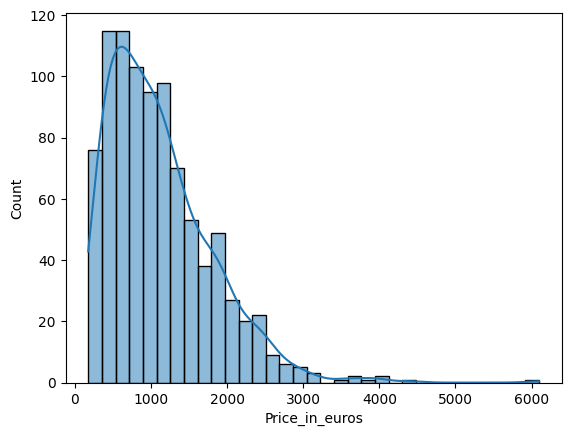

In [220]:
sns.histplot(x= target, data=df, kde=True)

In [221]:
df[df[target] > 1500].sort_values(by=target)

Company                             Product     TypeName  Inches  \
526     Asus  FX753VE-GC155T (i7-7700HQ/16GB/1TB       Gaming    17.3   
83     Apple                         MacBook 12"    Ultrabook    12.0   
1121     MSI                         GE72 Apache       Gaming    17.3   
1137      HP                      EliteBook 1040     Notebook    14.0   
16     Apple                         MacBook Pro    Ultrabook    13.3   
...      ...                                 ...          ...     ...   
243     Asus                   ROG G703VI-E5062T       Gaming    17.3   
1151      HP                            ZBook 17  Workstation    17.3   
1081    Asus                          ROG G701VO       Gaming    17.3   
758       HP                            Zbook 17  Workstation    17.3   
200    Razer                           Blade Pro       Gaming    17.3   

                         ScreenResolution                            Cpu  \
526                     Full HD 1920x1080    Intel Core i7 7700HQ 2.8GHz   
83     IPS Panel Retina Display 2304x1440           Intel Core i5 1.3GHz   
1121                    Full HD 1920x1080    Intel Core i7 6700HQ 2.6GHz   
1137                    Full HD 1920x1080     Intel Core i5 6200U 2.3GHz   
16     IPS Panel Retina Display 2560x1600           Intel Core i5 2.3GHz   
...                                   ...                            ...   
243                     Full HD 1920x1080    Intel Core i7 7820HK 2.9GHz   
1151          IPS Panel Full HD 1920x1080    Intel Core i7 6700HQ 2.6GHz   
1081          IPS Panel Full HD 1920x1080    Intel Core i7 6820HK 2.7GHz   
758           IPS Panel Full HD 1920x1080  Intel Xeon E3-1535M v5 2.9GHz   
200   4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz   

       Ram                Memory                           Gpu       OpSys  \
526   16GB  256GB SSD +  1TB HDD     Nvidia GeForce GTX1050 Ti  Windows 10   
83     8GB             512GB SSD         Intel HD Graphics 615       macOS   
1121   8GB  128GB SSD +  1TB HDD       Nvidia GeForce GTX 960M  Windows 10   
1137   8GB             256GB SSD         Intel HD Graphics 520   Windows 7   
16     8GB             256GB SSD  Intel Iris Plus Graphics 640       macOS   
...    ...                   ...                           ...         ...   
243   32GB  512GB SSD +  1TB HDD       Nvidia GeForce GTX 1080  Windows 10   
1151   8GB             256GB SSD          Nvidia Quadro M3000M   Windows 7   
1081  64GB               1TB SSD       Nvidia GeForce GTX 980   Windows 10   
758   16GB             256GB SSD          Nvidia Quadro M2000M   Windows 7   
200   32GB               1TB SSD       Nvidia GeForce GTX 1080  Windows 10   

      Weight  Price_in_euros  
526      3kg         1504.00  
83    0.92kg         1510.00  
1121   2.9kg         1511.19  
1137  1.43kg         1513.00  
16    1.37kg         1518.55  
...      ...             ...  
243    4.7kg         3890.00  
1151     3kg         3949.40  
1081  3.58kg         3975.00  
758      3kg         4389.00  
200   3.49kg         6099.00  

[213 rows x 12 columns]

## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [222]:
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
 12  inches            912 non-null    float64
 13  ram_gb            912 non-null    int32  
 14  weight_kg         912 non-null    float64
dtypes: float64(4), int32(1), object(10)
memory usage: 110.4+ KB


In [224]:
target = "Price_in_euros"
features_num = df.select_dtypes(include=[np.number]).columns.tolist()
features_num.remove("Inches")
features_num.remove(target)
features_num

['inches', 'ram_gb', 'weight_kg']

<Axes: xlabel='inches', ylabel='Count'>

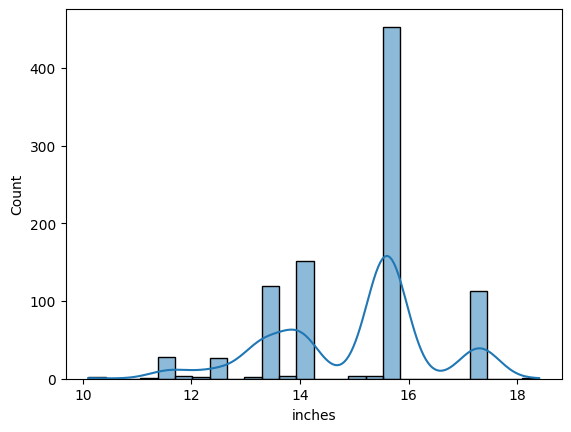

In [225]:
sns.histplot(x= "inches", data=df, kde=True)

In [226]:
# inches es una variable categorica

<Axes: xlabel='ram_gb', ylabel='Count'>

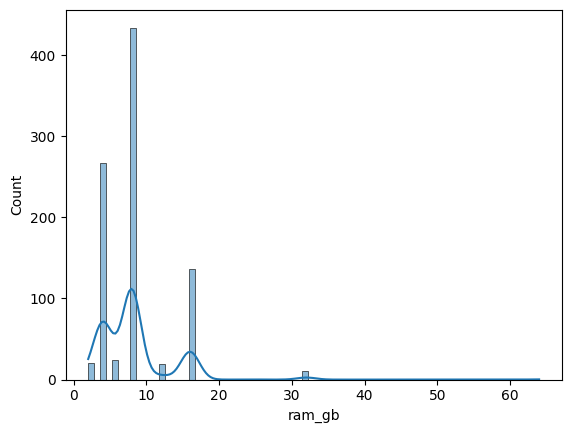

In [227]:
sns.histplot(x= "ram_gb", data=df, kde=True)

In [228]:
# ram_gb es variable categorica

(2,)


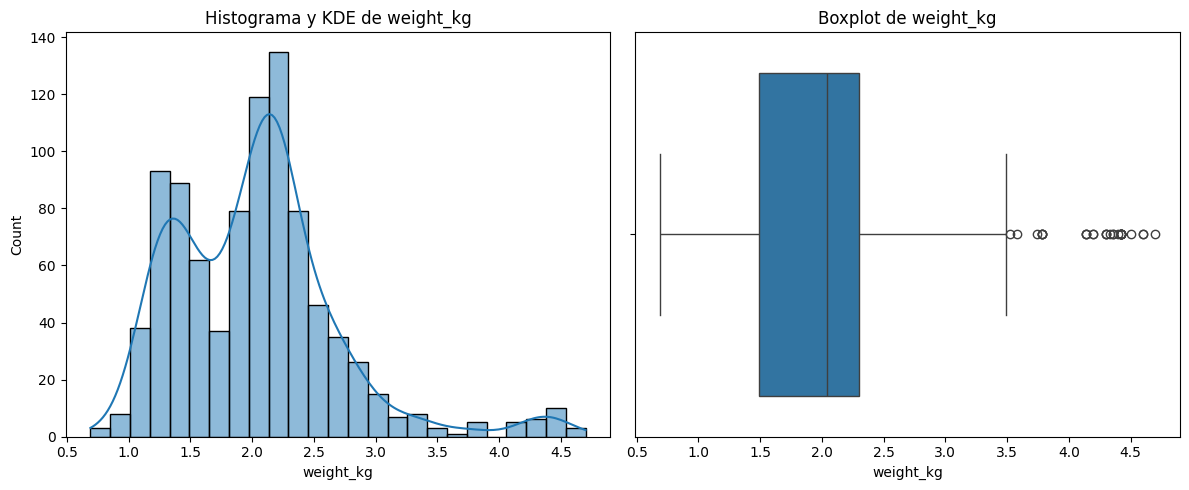

In [229]:
bt.plot_combined_graphs(df, ["weight_kg"])

In [230]:
features_num = ["weight_kg"]

In [231]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix[target].sort_values()

Inches            0.071043
inches            0.071043
weight_kg         0.197086
ram_gb            0.738922
Price_in_euros    1.000000
Name: Price_in_euros, dtype: float64

In [232]:
features_cat = df.select_dtypes(include=[object]).columns.tolist()
features_cat.remove("Ram")
features_cat.remove("Weight")
features_cat.append("inches")
features_cat.append("ram_gb")
features_cat

['Company',
 'Product',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'inches',
 'ram_gb']

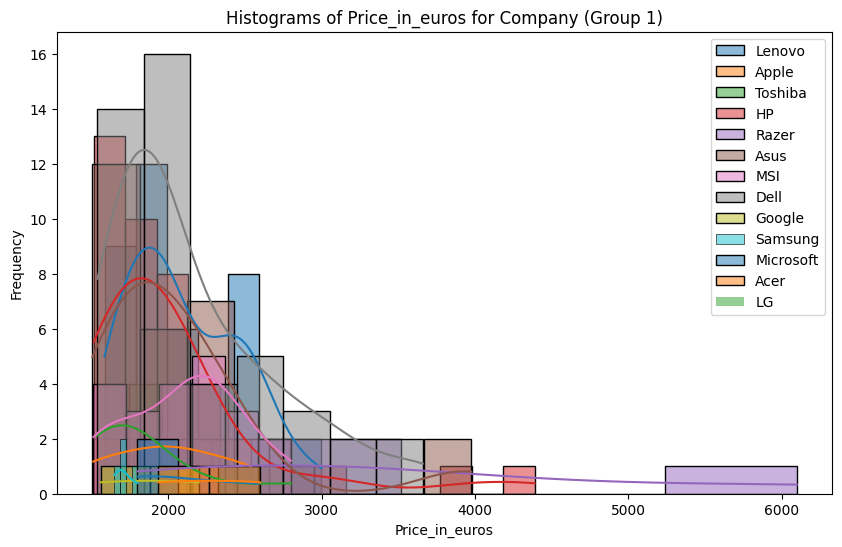

In [233]:


bt.plot_grouped_histograms(df[df[target]>1500], cat_col="Company", num_col=target, group_size=len(df["Company"].unique()))

In [234]:
df

Company             Product            TypeName  Inches  \
755       HP              250 G6            Notebook    15.6   
618     Dell       Inspiron 7559              Gaming    15.6   
909       HP         ProBook 450            Notebook    15.6   
2      Apple         Macbook Air           Ultrabook    13.3   
286     Dell       Inspiron 3567            Notebook    15.6   
...      ...                 ...                 ...     ...   
28      Dell       Inspiron 5570            Notebook    15.6   
1160      HP         Spectre Pro  2 in 1 Convertible    13.3   
78    Lenovo  IdeaPad 320-15IKBN            Notebook    15.6   
23        HP              255 G6            Notebook    15.6   
229     Dell        Alienware 17              Gaming    17.3   

                     ScreenResolution                           Cpu   Ram  \
755                 Full HD 1920x1080      Intel Core i3 6006U 2GHz   8GB   
618                 Full HD 1920x1080   Intel Core i7 6700HQ 2.6GHz  16GB   
909                 Full HD 1920x1080    Intel Core i7 7500U 2.7GHz   8GB   
2                            1440x900          Intel Core i5 1.8GHz   8GB   
286                 Full HD 1920x1080    Intel Core i3 6006U 2.0GHz   4GB   
...                               ...                           ...   ...   
28                  Full HD 1920x1080    Intel Core i5 8250U 1.6GHz   8GB   
1160  Full HD / Touchscreen 1920x1080    Intel Core i5 6300U 2.4GHz   8GB   
78                  Full HD 1920x1080    Intel Core i5 7200U 2.5GHz   8GB   
23                           1366x768  AMD E-Series E2-9000e 1.5GHz   4GB   
229       IPS Panel Full HD 1920x1080   Intel Core i7 7700HQ 2.8GHz  16GB   

                    Memory                             Gpu       OpSys  \
755              256GB SSD           Intel HD Graphics 520  Windows 10   
618                1TB HDD  Nvidia GeForce GTX 960<U+039C>  Windows 10   
909                1TB HDD            Nvidia GeForce 930MX  Windows 10   
2      128GB Flash Storage          Intel HD Graphics 6000       macOS   
286                1TB HDD              AMD Radeon R5 M430       Linux   
...                    ...                             ...         ...   
28               256GB SSD                  AMD Radeon 530  Windows 10   
1160             256GB SSD           Intel HD Graphics 520  Windows 10   
78                 2TB HDD           Intel HD Graphics 620       No OS   
23               500GB HDD                   AMD Radeon R2       No OS   
229   256GB SSD +  1TB HDD         Nvidia GeForce GTX 1060  Windows 10   

      Weight  Price_in_euros  inches  ram_gb  weight_kg  
755   1.86kg          539.00    15.6       8       1.86  
618   2.59kg          879.01    15.6      16       2.59  
909   2.04kg          900.00    15.6       8       2.04  
2     1.34kg          898.94    13.3       8       1.34  
286   2.25kg          428.00    15.6       4       2.25  
...      ...             ...     ...     ...        ...  
28     2.2kg          800.00    15.6       8       2.20  
1160  1.48kg         1629.00    13.3       8       1.48  
78     2.2kg          519.00    15.6       8       2.20  
23    1.86kg          258.00    15.6       4       1.86  
229   4.42kg         2456.34    17.3      16       4.42  

[912 rows x 15 columns]

In [235]:
# ¿ categoricas diferenciar si es relevante la ordenacion con el precio ? 
# Relevante --> Ordinal Encoding
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Lista de categorías a codificar
categorias_oe = ["Company", "TypeName", "ScreenResolution", "Cpu", "Memory", "Gpu", "OpSys"]

# Crear un diccionario para almacenar los valores ordinales asignados para todas las variables
valores_ordinales = {}

# DataFrame para almacenar las transformaciones
df_transformado = df.copy()

for i in categorias_oe:
    # Clasificar por el precio medio
    avg_price = df.groupby(i)['Price_in_euros'].mean().sort_values(ascending=True)
    categorias = avg_price.index.tolist()
    categoria_dict = {categoria: idx for idx, categoria in enumerate(categorias)}
    valores_ordinales[i] = categoria_dict
    ordinal_encoder = OrdinalEncoder(categories=[categorias])
    df_transformado[i] = ordinal_encoder.fit_transform(df[[i]])

# Convertir el diccionario `valores_ordinales` en un DataFrame
valores_ordinales_df = pd.DataFrame.from_dict(valores_ordinales, orient="index").stack().reset_index()
valores_ordinales_df.columns = ['Variable', 'Categoria', 'Valor_Ordinal']







In [252]:
df.Product.to_list()


['250 G6',
 'Inspiron 7559',
 'ProBook 450',
 'Macbook Air',
 'Inspiron 3567',
 'ProBook 650',
 'Envy 13-AD007nv',
 'IdeaPad 320-15IKB',
 'GL72M 7REX',
 'Thinkpad T570',
 'MacBook Pro',
 'Ideapad 320-15IKBR',
 'IdeaPad 320-15IAP',
 'Portege Z30-C-16P',
 'Latitude 5590',
 'IdeaPad 110-15IBR',
 'GP72MVR 7RFX',
 'ThinkPad X1',
 'GL62 6QF',
 'Portege X30-D-10X',
 'Chromebook 11',
 'Inspiron 5567',
 'IdeaPad 510s-14IKB',
 'LapBook 15.6"',
 'GE62 Apache',
 'ZBook 17',
 'Inspiron 7567',
 'VivoBook Pro',
 'Pro P2540UA-XO0198T',
 'Thinkpad 13',
 'MateBook X',
 'Inspiron 3567',
 'Vostro 5568',
 '250 G5',
 'EliteBook 840',
 'ZBook 17',
 '250 G6',
 'Inspiron 7570',
 'ThinkPad X1',
 'IdeaPad Y700-15ISK',
 'ThinkPad P51',
 'IdeaPad 320-15IKBN',
 'Portege Z30-C-1CV',
 'XPS 13',
 'IdeaPad 510-15IKB',
 '250 G6',
 '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
 'Blade Pro',
 'Rog Strix',
 'ProBook 440',
 'Thinkpad 13',
 'Chromebook 11',
 'Blade Pro',
 '15-AC110nv (i7-6500U/6GB/1TB/Radeon',
 'Probook 440',
 

In [250]:
valores_ordinales_df[valores_ordinales_df["Variable"]=="OpSys"]



Variable     Categoria  Valor_Ordinal
298    OpSys       Android            0.0
299    OpSys     Chrome OS            1.0
300    OpSys         No OS            2.0
301    OpSys         Linux            3.0
302    OpSys    Windows 10            4.0
303    OpSys      Mac OS X            5.0
304    OpSys  Windows 10 S            6.0
305    OpSys     Windows 7            7.0
306    OpSys         macOS            8.0

In [ ]:
df_transformado

Company             Product  TypeName  Inches  ScreenResolution   Cpu  \
755       7.0              250 G6       1.0    15.6              12.0  36.0   
618       8.0       Inspiron 7559       4.0    15.6              12.0  81.0   
909       7.0         ProBook 450       1.0    15.6              12.0  72.0   
2        13.0         Macbook Air       3.0    13.3              10.0  58.0   
286       8.0       Inspiron 3567       1.0    15.6              12.0  32.0   
...       ...                 ...       ...     ...               ...   ...   
28        8.0       Inspiron 5570       1.0    15.6              12.0  54.0   
1160      7.0         Spectre Pro       2.0    13.3              17.0  75.0   
78        5.0  IdeaPad 320-15IKBN       1.0    15.6              12.0  53.0   
23        7.0              255 G6       1.0    15.6               4.0  10.0   
229       8.0        Alienware 17       4.0    17.3              16.0  85.0   

       Ram  Memory   Gpu  OpSys  Weight  Price_in_euros  inches  ram_gb  \
755    8GB    20.0  41.0    4.0  1.86kg          539.00    15.6       8   
618   16GB    12.0  43.0    4.0  2.59kg          879.01    15.6      16   
909    8GB    12.0  39.0    4.0  2.04kg          900.00    15.6       8   
2      8GB    14.0  38.0    8.0  1.34kg          898.94    13.3       8   
286    4GB    12.0  18.0    3.0  2.25kg          428.00    15.6       4   
...    ...     ...   ...    ...     ...             ...     ...     ...   
28     8GB    20.0  32.0    4.0   2.2kg          800.00    15.6       8   
1160   8GB    20.0  41.0    4.0  1.48kg         1629.00    13.3       8   
78     8GB     7.0  46.0    2.0   2.2kg          519.00    15.6       8   
23     4GB    10.0   0.0    2.0  1.86kg          258.00    15.6       4   
229   16GB    29.0  71.0    4.0  4.42kg         2456.34    17.3      16   

      weight_kg  
755        1.86  
618        2.59  
909        2.04  
2          1.34  
286        2.25  
...         ...  
28         2.20  
1160       1.48  
78         2.20  
23         1.86  
229        4.42  

[912 rows x 15 columns]

In [ ]:
# Convertimos las variables categoricas en dummies:

categorias_gd = ["Product"]


df_transformado = pd.get_dummies(df_transformado, columns=categorias_gd)

In [ ]:
df_transformado

Company  TypeName  Inches  ScreenResolution   Cpu   Ram  Memory   Gpu  \
755       7.0       1.0    15.6              12.0  36.0   8GB    20.0  41.0   
618       8.0       4.0    15.6              12.0  81.0  16GB    12.0  43.0   
909       7.0       1.0    15.6              12.0  72.0   8GB    12.0  39.0   
2        13.0       3.0    13.3              10.0  58.0   8GB    14.0  38.0   
286       8.0       1.0    15.6              12.0  32.0   4GB    12.0  18.0   
...       ...       ...     ...               ...   ...   ...     ...   ...   
28        8.0       1.0    15.6              12.0  54.0   8GB    20.0  32.0   
1160      7.0       2.0    13.3              17.0  75.0   8GB    20.0  41.0   
78        5.0       1.0    15.6              12.0  53.0   8GB     7.0  46.0   
23        7.0       1.0    15.6               4.0  10.0   4GB    10.0   0.0   
229       8.0       4.0    17.3              16.0  85.0  16GB    29.0  71.0   

      OpSys  Weight  ...  Product_ZenBook UX430UA  Product_ZenBook UX430UN  \
755     4.0  1.86kg  ...                    False                    False   
618     4.0  2.59kg  ...                    False                    False   
909     4.0  2.04kg  ...                    False                    False   
2       8.0  1.34kg  ...                    False                    False   
286     3.0  2.25kg  ...                    False                    False   
...     ...     ...  ...                      ...                      ...   
28      4.0   2.2kg  ...                    False                    False   
1160    4.0  1.48kg  ...                    False                    False   
78      2.0   2.2kg  ...                    False                    False   
23      2.0  1.86kg  ...                    False                    False   
229     4.0  4.42kg  ...                    False                    False   

      Product_ZenBook UX510UX-CN211T  Product_ZenBook UX530UQ-PRO  \
755                            False                        False   
618                            False                        False   
909                            False                        False   
2                              False                        False   
286                            False                        False   
...                              ...                          ...   
28                             False                        False   
1160                           False                        False   
78                             False                        False   
23                             False                        False   
229                            False                        False   

      Product_Zenbook 3  Product_Zenbook Flip  Product_Zenbook UX390UA  \
755               False                 False                    False   
618               False                 False                    False   
909               False                 False                    False   
2                 False                 False                    False   
286               False                 False                    False   
...                 ...                   ...                      ...   
28                False                 False                    False   
1160              False                 False                    False   
78                False                 False                    False   
23                False                 False                    False   
229               False                 False                    False   

      Product_Zenbook UX410UA-GV027T  Product_Zenbook UX430UA  \
755                            False                    False   
618                            False                    False   
909                            False                    False   
2                              False                    False   
286                            False                    False   
...         

In [ ]:
df_transformado = df_transformado.drop(columns=["Inches", "Ram", "Weight"])

In [ ]:
features_num = df_transformado.columns.to_list()
features_num

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'Price_in_euros',
 'inches',
 'ram_gb',
 'weight_kg',
 'Product_110-15ACL (A6-7310/4GB/500GB/W10)',
 'Product_14-am079na (N3710/8GB/2TB/W10)',
 'Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon',
 'Product_15-AY023na (N3710/8GB/2TB/W10)',
 'Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon',
 'Product_15-BS078nr (i7-7500U/8GB/1TB/W10)',
 'Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)',
 'Product_15-BW004nv (A9-9420/4GB/256GB/Radeon',
 'Product_15-BW037na (A9-9420/4GB/1TB/Radeon',
 'Product_15-BW091ND (A9-9420/6GB/1TB',
 'Product_15-BW094nd (A6-9220/8GB/128GB/W10)',
 'Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon',
 'Product_15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
 'Product_15-bs005nv (i3-6006U/4GB/1TB',
 'Product_15-bs012nv (i7-7500U/8GB/1TB/Radeon',
 'Product_15-bs025nv (i5-7200U/8GB/256GB/W10)',
 'Product_15-bs053od (i7-7500U/6GB/1TB/W10)',
 'Product_15-bs078cl (i7-7500U/8GB/2TB/W10)',
 'Product_15-bs190od (

In [ ]:
features_num.remove("Price_in_euros")

In [ ]:
features_num

['Company',
 'TypeName',
 'ScreenResolution',
 'Cpu',
 'Memory',
 'Gpu',
 'OpSys',
 'inches',
 'ram_gb',
 'weight_kg',
 'Product_110-15ACL (A6-7310/4GB/500GB/W10)',
 'Product_14-am079na (N3710/8GB/2TB/W10)',
 'Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon',
 'Product_15-AY023na (N3710/8GB/2TB/W10)',
 'Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon',
 'Product_15-BS078nr (i7-7500U/8GB/1TB/W10)',
 'Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)',
 'Product_15-BW004nv (A9-9420/4GB/256GB/Radeon',
 'Product_15-BW037na (A9-9420/4GB/1TB/Radeon',
 'Product_15-BW091ND (A9-9420/6GB/1TB',
 'Product_15-BW094nd (A6-9220/8GB/128GB/W10)',
 'Product_15-ay047nv (i3-6006U/6GB/1TB/Radeon',
 'Product_15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)',
 'Product_15-bs005nv (i3-6006U/4GB/1TB',
 'Product_15-bs012nv (i7-7500U/8GB/1TB/Radeon',
 'Product_15-bs025nv (i5-7200U/8GB/256GB/W10)',
 'Product_15-bs053od (i7-7500U/6GB/1TB/W10)',
 'Product_15-bs078cl (i7-7500U/8GB/2TB/W10)',
 'Product_15-bs190od (i5-8250U/4GB/1TB/W1

In [ ]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_transformado[features_num] = scaler.fit_transform(df_transformado[features_num])


In [ ]:
df_transformado

Company  TypeName  ScreenResolution       Cpu    Memory       Gpu  \
755   0.021242 -0.734828          0.001027 -0.957408  0.244381 -0.042600   
618   0.386767  1.624901          0.001027  0.967445 -0.794062  0.052975   
909   0.021242 -0.734828          0.001027  0.582474 -0.794062 -0.138175   
2     2.214391  0.838325         -0.311096 -0.016369 -0.534451 -0.185962   
286   0.386767 -0.734828          0.001027 -1.128506 -0.794062 -1.141711   
...        ...       ...               ...       ...       ...       ...   
28    0.386767 -0.734828          0.001027 -0.187467  0.244381 -0.472687   
1160  0.021242  0.051748          0.781333  0.710798  0.244381 -0.042600   
78   -0.709807 -0.734828          0.001027 -0.230241 -1.443088  0.196337   
23    0.021242 -0.734828         -1.247463 -2.069546 -1.053672 -2.001886   
229   0.386767  1.624901          0.625272  1.138543  1.412630  1.391024   

         OpSys  Price_in_euros    inches    ram_gb  ...  \
755   0.070263          539.00  0.430676 -0.052193  ...   
618   0.070263          879.01  0.430676  1.534472  ...   
909   0.070263          900.00  0.430676 -0.052193  ...   
2     4.013665          898.94 -1.171072 -0.052193  ...   
286  -0.915587          428.00  0.430676 -0.845526  ...   
...        ...             ...       ...       ...  ...   
28    0.070263          800.00  0.430676 -0.052193  ...   
1160  0.070263         1629.00 -1.171072 -0.052193  ...   
78   -1.901437          519.00  0.430676 -0.052193  ...   
23   -1.901437          258.00  0.430676 -0.845526  ...   
229   0.070263         2456.34  1.614577  1.534472  ...   

      Product_ZenBook UX430UA  Product_ZenBook UX430UN  \
755                 -0.033131                -0.033131   
618                 -0.033131                -0.033131   
909                 -0.033131                -0.033131   
2                   -0.033131                -0.033131   
286                 -0.033131                -0.033131   
...                       ...                      ...   
28                  -0.033131                -0.033131   
1160                -0.033131                -0.033131   
78                  -0.033131                -0.033131   
23                  -0.033131                -0.033131   
229                 -0.033131                -0.033131   

      Product_ZenBook UX510UX-CN211T  Product_ZenBook UX530UQ-PRO  \
755                        -0.033131                    -0.033131   
618                        -0.033131                    -0.033131   
909                        -0.033131                    -0.033131   
2                          -0.033131                    -0.033131   
286                        -0.033131                    -0.033131   
...                              ...                          ...   
28                         -0.033131                    -0.033131   
1160                       -0.033131                    -0.033131   
78                         -0.033131                    -0.033131   
23                         -0.033131                    -0.033131   
229                        -0.033131                    -0.033131   

      Product_Zenbook 3  Product_Zenbook Flip  Product_Zenbook UX390UA  \
755           -0.046881             -0.033131                -0.033131   
618           -0.046881             -0.033131                -0.033131   
909           -0.046881             -0.033131                -0.033131   
2             -0.046881             -0.033131                -0.033131   
286           -0.046881             -0.033131                -0.033131   
...                 ...                   ...                      ...   
28            -0.046881             -0.033131                -0.033131   
1160          -0.046881             -0.033131                -0.033131   
78            -0.046881             -0.033131                -0.033131   
23            -0.046881             -0.033131                -0.033131   
229           -0.046881             -0.033131

## Modelado

### 1. Definir X e y

In [ ]:
X = df_transformado.drop(['Price_in_euros'], axis=1)
y = df_transformado['Price_in_euros'].copy()
X.shape

(912, 490)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Columns: 490 entries, Company to Product_Zenbook UX510UW-FI095T
dtypes: bool(480), float64(9), int32(1)
memory usage: 502.3 KB


In [ ]:
X.shape

(912, 490)

In [ ]:
y.shape

(912,)

In [ ]:
y

755      539.00
618      879.01
909      900.00
2        898.94
286      428.00
         ...   
28       800.00
1160    1629.00
78       519.00
23       258.00
229     2456.34
Name: Price_in_euros, Length: 912, dtype: float64

### 2. Dividir X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
X_train

Company  TypeName  ScreenResolution       Cpu    Memory       Gpu  \
1118  0.021242  2.411478          0.625272  0.967445 -0.794062  2.107836   
153   0.386767  1.624901          0.001027  1.138543  1.542435  0.626424   
275   2.214391  0.838325          1.561639  1.437965  1.542435  1.534386   
1100  0.021242 -0.734828          0.001027  0.111955 -1.053672 -0.042600   
131   0.386767 -0.734828          0.001027  0.368602  1.282824 -0.472687   
...        ...       ...               ...       ...       ...       ...   
578   0.021242 -0.734828         -1.247463 -1.470702 -1.443088 -1.667374   
996  -0.709807 -0.734828          0.001027 -0.401339  0.244381 -0.472687   
770   0.386767  0.838325          0.001027  1.095769  0.244381  0.196337   
407  -0.709807 -0.734828         -1.247463 -1.855673 -0.794062 -1.906311   
418  -0.709807  0.838325          2.185883  1.138543  1.542435  0.530849   

         OpSys    inches    ram_gb  weight_kg  ...  Product_ZenBook UX430UA  \
1118  3.027814  1.614577 -0.052193   1.463029  ...                -0.033131   
153   0.070263  0.430676  1.534472   0.801476  ...                -0.033131   
275   4.013665 -1.171072 -0.052193  -0.987726  ...                -0.033131   
1100  3.027814 -0.683584 -0.845526  -0.732125  ...                -0.033131   
131   0.070263  1.614577  1.534472   1.162323  ...                -0.033131   
...        ...       ...       ...        ...  ...                      ...   
578   0.070263 -0.683584 -0.052193  -0.130713  ...                -0.033131   
996   0.070263  0.430676 -0.448859   0.260205  ...                -0.033131   
770   0.070263 -1.728202  1.534472  -1.273396  ...                -0.033131   
407   0.070263  0.430676 -0.845526   0.260205  ...                -0.033131   
418   0.070263 -0.683584 -0.052193  -0.491560  ...                -0.033131   

      Product_ZenBook UX430UN  Product_ZenBook UX510UX-CN211T  \
1118                -0.033131                       -0.033131   
153                 -0.033131                       -0.033131   
275                 -0.033131                       -0.033131   
1100                -0.033131                       -0.033131   
131                 -0.033131                       -0.033131   
...                       ...                             ...   
578                 -0.033131                       -0.033131   
996                 -0.033131                       -0.033131   
770                 -0.033131                       -0.033131   
407                 -0.033131                       -0.033131   
418                 -0.033131                       -0.033131   

      Product_ZenBook UX530UQ-PRO  Product_Zenbook 3  Product_Zenbook Flip  \
1118                    -0.033131          -0.046881             -0.033131   
153                     -0.033131          -0.046881             -0.033131   
275                     -0.033131          -0.046881             -0.033131   
1100                    -0.033131          -0.046881             -0.033131   
131                     -0.033131          -0.046881             -0.033131   
...                           ...                ...                   ...   
578                     -0.033131          -0.046881             -0.033131   
996                     -0.033131          -0.046881             -0.033131   
770                     -0.033131          -0.046881             -0.033131   
407                     -0.033131          -0.046881             -0.033131   
418                     -0.033131          -0.046881             -0.033131   

      Product_Zenbook UX390UA  Product_Zenbook UX410UA-GV027T  \
1118                -0.033131                       -0.033131   
153                 -0.033131                       -0.033131   
275                 -0.033131                       -0.033131   
1100                -0.033131                       -0.033131   
131                 -0.033131                       -0.033131   
...                       ...        

In [ ]:
y_train

1118    2899.00
153     1249.26
275     1958.90
1100    1030.99
131     1396.00
         ...   
578      389.00
996      549.00
770     1859.00
407      306.00
418     1943.00
Name: Price_in_euros, Length: 729, dtype: float64

### 3. Baseline de modelos


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import xgboost

# Definir el modelo
xgb_reg = xgboost.XGBRFRegressor(random_state=42)

# Definir los parámetros a optimizar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0]
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Ajustar GridSearchCV a los datos
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_

In [ ]:
best_params

{'colsample_bytree': 1.0,
 'learning_rate': 0.2,
 'max_depth': 8,
 'n_estimators': 100,
 'subsample': 1.0}

In [ ]:

xgb_reg = xgboost.XGBRFRegressor(random_state=42, **best_params)

xgb_reg.fit(X_train, y_train)

XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=1.0, device=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.2, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, objective='reg:squarederror',
               random_state=42, ...)

In [ ]:
X_test

Company  TypeName  ScreenResolution       Cpu    Memory       Gpu  \
451   0.021242  1.624901          0.625272  1.138543  0.633797  0.626424   
802  -0.709807  0.051748          0.781333 -0.230241  0.244381 -0.424900   
723  -0.709807 -0.734828          0.625272 -0.230241  0.244381 -1.093924   
682   0.021242  0.051748          0.157088 -0.700761 -0.664256 -0.329325   
1306 -0.344283 -0.734828         -1.247463 -1.983997 -1.053672 -1.762948   
...        ...       ...               ...       ...       ...       ...   
369   0.021242 -0.734828          0.001027 -0.230241 -0.794062  0.196337   
626  -1.440857  0.051748         -1.715646 -1.684575 -1.832505 -1.954098   
416  -0.709807 -0.734828         -1.247463 -1.855673 -1.832505 -1.906311   
546  -0.709807 -0.734828          0.625272  0.582474  0.244381 -0.329325   
260   0.386767  0.838325          0.001027 -0.187467  0.244381  0.674212   

         OpSys    inches    ram_gb  weight_kg  ...  Product_ZenBook UX430UA  \
451   0.070263  0.430676 -0.052193   0.260205  ...                -0.033131   
802   0.070263  0.430676 -0.052193   0.079781  ...                -0.033131   
723   0.070263 -0.683584 -0.052193  -0.235960  ...                -0.033131   
682   0.070263 -0.683584 -0.845526  -0.596808  ...                -0.033131   
1306  0.070263  0.430676 -0.845526   0.260205  ...                -0.033131   
...        ...       ...       ...        ...  ...                      ...   
369   0.070263  0.430676 -0.052193  -0.250996  ...                -0.033131   
626  -2.887287 -2.354973 -0.845526  -1.168149  ...                -0.033131   
416   0.070263 -2.354973 -1.242192  -1.318502  ...                -0.033131   
546   0.070263 -0.683584 -0.052193  -0.235960  ...                -0.033131   
260   0.070263 -1.171072 -0.052193  -0.927584  ...                -0.033131   

      Product_ZenBook UX430UN  Product_ZenBook UX510UX-CN211T  \
451                 -0.033131                       -0.033131   
802                 -0.033131                       -0.033131   
723                 -0.033131                       -0.033131   
682                 -0.033131                       -0.033131   
1306                -0.033131                       -0.033131   
...                       ...                             ...   
369                 -0.033131                       -0.033131   
626                 -0.033131                       -0.033131   
416                 -0.033131                       -0.033131   
546                 -0.033131                       -0.033131   
260                 -0.033131                       -0.033131   

      Product_ZenBook UX530UQ-PRO  Product_Zenbook 3  Product_Zenbook Flip  \
451                     -0.033131          -0.046881             -0.033131   
802                     -0.033131          -0.046881             -0.033131   
723                     -0.033131          -0.046881             -0.033131   
682                     -0.033131          -0.046881             -0.033131   
1306                    -0.033131          -0.046881             -0.033131   
...                           ...                ...                   ...   
369                     -0.033131          -0.046881             -0.033131   
626                     -0.033131          -0.046881             -0.033131   
416                     -0.033131          -0.046881             -0.033131   
546                     -0.033131          -0.046881             -0.033131   
260                     -0.033131          -0.046881             -0.033131   

      Product_Zenbook UX390UA  Product_Zenbook UX410UA-GV027T  \
451                 -0.033131                       -0.033131   
802                 -0.033131                       -0.033131   
723                 -0.033131                       -0.033131   
682                 -0.033131                       -0.033131   
1306                -0.033131                       -0.033131   
...                       ...        

In [ ]:
y_pred = xgb_reg.predict(X_test)

In [ ]:
y_pred = y_pred


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [ ]:
RMSE = root_mean_squared_error(y_test, y_pred)
print(RMSE)

623.6379525455432


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [ ]:
X_pred = pd.read_csv("data/test.csv", index_col=0)
X_pred.index.name = None
X_pred.head()


Company                          Product            TypeName  Inches  \
209   Lenovo               Legion Y520-15IKBN              Gaming    15.6   
1281    Acer                   Aspire ES1-531            Notebook    15.6   
1168  Lenovo  V110-15ISK (i3-6006U/4GB/1TB/No            Notebook    15.6   
1231    Dell                    Inspiron 7579  2 in 1 Convertible    15.6   
1020      HP                      ProBook 640            Notebook    14.0   

                               ScreenResolution  \
209                           Full HD 1920x1080   
1281                                   1366x768   
1168                                   1366x768   
1231  IPS Panel Full HD / Touchscreen 1920x1080   
1020                          Full HD 1920x1080   

                                       Cpu   Ram     Memory  \
209            Intel Core i7 7700HQ 2.8GHz  16GB  512GB SSD   
1281  Intel Celeron Dual Core N3060 1.6GHz   4GB  500GB HDD   
1168            Intel Core i3 6006U 2.0GHz   4GB    1TB HDD   
1231            Intel Core i5 7200U 2.5GHz   8GB  256GB SSD   
1020            Intel Core i5 7200U 2.5GHz   4GB  256GB SSD   

                          Gpu       OpSys   Weight  
209   Nvidia GeForce GTX 1060       No OS    2.4kg  
1281    Intel HD Graphics 400       Linux    2.4kg  
1168    Intel HD Graphics 520       No OS    1.9kg  
1231    Intel HD Graphics 620  Windows 10  2.191kg  
1020    Intel HD Graphics 620  Windows 10   1.95kg

In [ ]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)

In [ ]:
valores_ordinales_df

Variable     Categoria  Valor_Ordinal
0    Company          Vero            0.0
1    Company         Chuwi            1.0
2    Company      Mediacom            2.0
3    Company          Acer            3.0
4    Company       Fujitsu            4.0
..       ...           ...            ...
302    OpSys    Windows 10            4.0
303    OpSys      Mac OS X            5.0
304    OpSys  Windows 10 S            6.0
305    OpSys     Windows 7            7.0
306    OpSys         macOS            8.0

[307 rows x 3 columns]

In [ ]:
# Crear un diccionario para almacenar los valores ordinales asignados para todas las variables
valores_ordinales = {}

for var in categorias_oe:
    categorias = valores_ordinales_df[valores_ordinales_df['Variable'] == var].sort_values(by='Valor_Ordinal')['Categoria'].tolist()
    valores_ordinales[var] = categorias

# Ahora puedes usar el diccionario `valores_ordinales` para inicializar `OrdinalEncoder`
for i in categorias_oe:
    categorias = [valores_ordinales[i]]
    ordinal_encoder = OrdinalEncoder(categories=categorias, handle_unknown='use_encoded_value', unknown_value=-1)
    
    # Ajustar y transformar X_pred utilizando el OrdinalEncoder
    X_pred[i] = ordinal_encoder.fit_transform(X_pred[[i]])
    
    # Rellenar categorías faltantes con el valor más alto
    max_value = len(categorias[0]) - 1
    X_pred[i] = np.where(X_pred[i] == -1, max_value, X_pred[i])



In [ ]:
X_pred

Company                          Product  TypeName  Inches  \
209       5.0               Legion Y520-15IKBN       4.0    15.6   
1281      3.0                   Aspire ES1-531       1.0    15.6   
1168      5.0  V110-15ISK (i3-6006U/4GB/1TB/No       1.0    15.6   
1231      8.0                    Inspiron 7579       2.0    15.6   
1020      7.0                      ProBook 640       1.0    14.0   
...       ...                              ...       ...     ...   
820      14.0                      GE72MVR 7RG       4.0    17.3   
948      10.0                  Tecra Z40-C-12X       1.0    14.0   
483       8.0                  Precision M5520       5.0    15.6   
1017      7.0                      Probook 440       1.0    14.0   
421       6.0                     ZenBook Flip       2.0    13.3   

      ScreenResolution   Cpu   Ram  Memory   Gpu  OpSys   Weight  inches  \
209               12.0  85.0  16GB    30.0  71.0    2.0    2.4kg    15.6   
1281               4.0   8.0   4GB    10.0   1.0    3.0    2.4kg    15.6   
1168               4.0  32.0   4GB    12.0  41.0    2.0    1.9kg    15.6   
1231              13.0  53.0   8GB    20.0  46.0    4.0  2.191kg    15.6   
1020              12.0  53.0   4GB    20.0  46.0    4.0   1.95kg    14.0   
...                ...   ...   ...     ...   ...    ...      ...     ...   
820               12.0  85.0  16GB    33.0  84.0    4.0    2.9kg    17.3   
948               16.0  61.0   4GB    13.0  41.0    4.0   1.47kg    14.0   
483               12.0  85.0   8GB    20.0  78.0    4.0   1.78kg    15.6   
1017               4.0  53.0   4GB    10.0  46.0    4.0   1.64kg    14.0   
421               13.0  53.0   8GB    20.0  46.0    4.0   1.27kg    13.3   

      ram_gb  weight_kg  
209       16      2.400  
1281       4      2.400  
1168       4      1.900  
1231       8      2.191  
1020       4      1.950  
...      ...        ...  
820       16      2.900  
948        4      1.470  
483        8      1.780  
1017       4      1.640  
421        8      1.270  

[391 rows x 14 columns]

In [ ]:
X_pred = pd.get_dummies(X_pred, columns=categorias_gd)

In [ ]:
X_pred= X_pred.drop(columns=["Inches", "Ram", "Weight"])

In [ ]:
# Escalamos las variables numericas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler with the training data
scaler.fit(X_train[features_num])

# Ensure X_pred has the same columns as X_train
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=0)

X_pred[features_num] = scaler.transform(X_pred[features_num])

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 490 entries, Company to Product_Zenbook UX510UW-FI095T
dtypes: float64(490)
memory usage: 1.5 MB


In [ ]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 451 to 260
Columns: 490 entries, Company to Product_Zenbook UX510UW-FI095T
dtypes: float64(490)
memory usage: 702.0 KB


In [ ]:
X_pred


Company  TypeName  ScreenResolution        Cpu     Memory        Gpu  \
209    5.149005  4.064996         12.205026  86.408913  30.812054  72.622930   
1281   3.090566  1.031013          4.067646   8.129684  10.270140   1.021329   
1168   5.149005  1.031013          4.067646  32.528405  12.324331  41.936529   
1231   8.236663  2.042340         13.222198  53.877286  20.541097  47.050929   
1020   7.207443  1.031013         12.205026  53.877286  20.541097  47.050929   
...         ...       ...               ...        ...        ...        ...   
820   14.411978  4.064996         12.205026  86.408913  33.893341  85.920370   
948   10.295101  1.031013         16.273716  62.010192  13.351427  41.936529   
483    8.236663  5.076324         12.205026  86.408913  20.541097  79.783090   
1017   7.207443  1.031013          4.067646  53.877286  10.270140  47.050929   
421    6.178224  2.042340         13.222198  53.877286  20.541097  47.050929   

         OpSys     inches     ram_gb  weight_kg  ...  Product_ZenBook UX430UA  \
209   2.081146  15.674682  16.195938   2.380632  ...                -0.007437   
1281  3.126637  15.674682   4.053494   2.380632  ...                -0.007437   
1168  2.081146  15.674682   4.053494   1.882541  ...                -0.007437   
1231  4.172128  15.674682   8.100975   2.172430  ...                -0.007437   
1020  4.172128  14.065492   4.053494   1.932350  ...                -0.007437   
...        ...        ...        ...        ...  ...                      ...   
820   4.172128  17.384446  16.195938   2.878724  ...                -0.007437   
948   4.172128  14.065492   4.053494   1.454182  ...                -0.007437   
483   4.172128  15.674682   8.100975   1.762999  ...                -0.007437   
1017  4.172128  14.065492   4.053494   1.623533  ...                -0.007437   
421   4.172128  13.361471   8.100975   1.254946  ...                -0.007437   

      Product_ZenBook UX430UN  Product_ZenBook UX510UX-CN211T  \
209                 -0.007437                       -0.007437   
1281                -0.007437                       -0.007437   
1168                -0.007437                       -0.007437   
1231                -0.007437                       -0.007437   
1020                -0.007437                       -0.007437   
...                       ...                             ...   
820                 -0.007437                       -0.007437   
948                 -0.007437                       -0.007437   
483                 -0.007437                       -0.007437   
1017                -0.007437                       -0.007437   
421                 -0.007437                       -0.007437   

      Product_ZenBook UX530UQ-PRO  Product_Zenbook 3  Product_Zenbook Flip  \
209                      0.033131           0.022189             -0.007437   
1281                     0.033131           0.022189             -0.007437   
1168                     0.033131           0.022189             -0.007437   
1231                     0.033131           0.022189             -0.007437   
1020                     0.033131           0.022189             -0.007437   
...                           ...                ...                   ...   
820                      0.033131           0.022189             -0.007437   
948                      0.033131           0.022189             -0.007437   
483                      0.033131           0.022189             -0.007437   
1017                     0.033131           0.022189             -0.007437   
421                      0.033131           0.022189             -0.007437   

      Product_Zenbook UX390UA  Product_Zenbook UX410UA-GV027T  \
209                 -0.007437                       -0.007437   
1281                -0.007437                       -0.007437   
1168                -0.007437                       -0.007437   
1231                -0.007437                       -0.007437   
1020                -0.007437  

In [ ]:
X_train

Company  TypeName  ScreenResolution       Cpu    Memory       Gpu  \
1118  0.021242  2.411478          0.625272  0.967445 -0.794062  2.107836   
153   0.386767  1.624901          0.001027  1.138543  1.542435  0.626424   
275   2.214391  0.838325          1.561639  1.437965  1.542435  1.534386   
1100  0.021242 -0.734828          0.001027  0.111955 -1.053672 -0.042600   
131   0.386767 -0.734828          0.001027  0.368602  1.282824 -0.472687   
...        ...       ...               ...       ...       ...       ...   
578   0.021242 -0.734828         -1.247463 -1.470702 -1.443088 -1.667374   
996  -0.709807 -0.734828          0.001027 -0.401339  0.244381 -0.472687   
770   0.386767  0.838325          0.001027  1.095769  0.244381  0.196337   
407  -0.709807 -0.734828         -1.247463 -1.855673 -0.794062 -1.906311   
418  -0.709807  0.838325          2.185883  1.138543  1.542435  0.530849   

         OpSys    inches    ram_gb  weight_kg  ...  Product_ZenBook UX430UA  \
1118  3.027814  1.614577 -0.052193   1.463029  ...                -0.033131   
153   0.070263  0.430676  1.534472   0.801476  ...                -0.033131   
275   4.013665 -1.171072 -0.052193  -0.987726  ...                -0.033131   
1100  3.027814 -0.683584 -0.845526  -0.732125  ...                -0.033131   
131   0.070263  1.614577  1.534472   1.162323  ...                -0.033131   
...        ...       ...       ...        ...  ...                      ...   
578   0.070263 -0.683584 -0.052193  -0.130713  ...                -0.033131   
996   0.070263  0.430676 -0.448859   0.260205  ...                -0.033131   
770   0.070263 -1.728202  1.534472  -1.273396  ...                -0.033131   
407   0.070263  0.430676 -0.845526   0.260205  ...                -0.033131   
418   0.070263 -0.683584 -0.052193  -0.491560  ...                -0.033131   

      Product_ZenBook UX430UN  Product_ZenBook UX510UX-CN211T  \
1118                -0.033131                       -0.033131   
153                 -0.033131                       -0.033131   
275                 -0.033131                       -0.033131   
1100                -0.033131                       -0.033131   
131                 -0.033131                       -0.033131   
...                       ...                             ...   
578                 -0.033131                       -0.033131   
996                 -0.033131                       -0.033131   
770                 -0.033131                       -0.033131   
407                 -0.033131                       -0.033131   
418                 -0.033131                       -0.033131   

      Product_ZenBook UX530UQ-PRO  Product_Zenbook 3  Product_Zenbook Flip  \
1118                    -0.033131          -0.046881             -0.033131   
153                     -0.033131          -0.046881             -0.033131   
275                     -0.033131          -0.046881             -0.033131   
1100                    -0.033131          -0.046881             -0.033131   
131                     -0.033131          -0.046881             -0.033131   
...                           ...                ...                   ...   
578                     -0.033131          -0.046881             -0.033131   
996                     -0.033131          -0.046881             -0.033131   
770                     -0.033131          -0.046881             -0.033131   
407                     -0.033131          -0.046881             -0.033131   
418                     -0.033131          -0.046881             -0.033131   

      Product_Zenbook UX390UA  Product_Zenbook UX410UA-GV027T  \
1118                -0.033131                       -0.033131   
153                 -0.033131                       -0.033131   
275                 -0.033131                       -0.033131   
1100                -0.033131                       -0.033131   
131                 -0.033131                       -0.033131   
...                       ...        

In [ ]:
# Columnas de X_pred debe coincidir con X_train y los valores se rellenan a False
X_pred = X_pred.reindex(columns=X_train.columns, fill_value=False)

In [ ]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Columns: 490 entries, Company to Product_Zenbook UX510UW-FI095T
dtypes: float64(490)
memory usage: 1.5 MB


In [ ]:
X_train

Company  TypeName  ScreenResolution       Cpu    Memory       Gpu  \
1118  0.021242  2.411478          0.625272  0.967445 -0.794062  2.107836   
153   0.386767  1.624901          0.001027  1.138543  1.542435  0.626424   
275   2.214391  0.838325          1.561639  1.437965  1.542435  1.534386   
1100  0.021242 -0.734828          0.001027  0.111955 -1.053672 -0.042600   
131   0.386767 -0.734828          0.001027  0.368602  1.282824 -0.472687   
...        ...       ...               ...       ...       ...       ...   
578   0.021242 -0.734828         -1.247463 -1.470702 -1.443088 -1.667374   
996  -0.709807 -0.734828          0.001027 -0.401339  0.244381 -0.472687   
770   0.386767  0.838325          0.001027  1.095769  0.244381  0.196337   
407  -0.709807 -0.734828         -1.247463 -1.855673 -0.794062 -1.906311   
418  -0.709807  0.838325          2.185883  1.138543  1.542435  0.530849   

         OpSys    inches    ram_gb  weight_kg  ...  Product_ZenBook UX430UA  \
1118  3.027814  1.614577 -0.052193   1.463029  ...                -0.033131   
153   0.070263  0.430676  1.534472   0.801476  ...                -0.033131   
275   4.013665 -1.171072 -0.052193  -0.987726  ...                -0.033131   
1100  3.027814 -0.683584 -0.845526  -0.732125  ...                -0.033131   
131   0.070263  1.614577  1.534472   1.162323  ...                -0.033131   
...        ...       ...       ...        ...  ...                      ...   
578   0.070263 -0.683584 -0.052193  -0.130713  ...                -0.033131   
996   0.070263  0.430676 -0.448859   0.260205  ...                -0.033131   
770   0.070263 -1.728202  1.534472  -1.273396  ...                -0.033131   
407   0.070263  0.430676 -0.845526   0.260205  ...                -0.033131   
418   0.070263 -0.683584 -0.052193  -0.491560  ...                -0.033131   

      Product_ZenBook UX430UN  Product_ZenBook UX510UX-CN211T  \
1118                -0.033131                       -0.033131   
153                 -0.033131                       -0.033131   
275                 -0.033131                       -0.033131   
1100                -0.033131                       -0.033131   
131                 -0.033131                       -0.033131   
...                       ...                             ...   
578                 -0.033131                       -0.033131   
996                 -0.033131                       -0.033131   
770                 -0.033131                       -0.033131   
407                 -0.033131                       -0.033131   
418                 -0.033131                       -0.033131   

      Product_ZenBook UX530UQ-PRO  Product_Zenbook 3  Product_Zenbook Flip  \
1118                    -0.033131          -0.046881             -0.033131   
153                     -0.033131          -0.046881             -0.033131   
275                     -0.033131          -0.046881             -0.033131   
1100                    -0.033131          -0.046881             -0.033131   
131                     -0.033131          -0.046881             -0.033131   
...                           ...                ...                   ...   
578                     -0.033131          -0.046881             -0.033131   
996                     -0.033131          -0.046881             -0.033131   
770                     -0.033131          -0.046881             -0.033131   
407                     -0.033131          -0.046881             -0.033131   
418                     -0.033131          -0.046881             -0.033131   

      Product_Zenbook UX390UA  Product_Zenbook UX410UA-GV027T  \
1118                -0.033131                       -0.033131   
153                 -0.033131                       -0.033131   
275                 -0.033131                       -0.033131   
1100                -0.033131                       -0.033131   
131                 -0.033131                       -0.033131   
...                       ...        

 ## 2. Replicar el procesado para ``test.csv``

In [ ]:
X_pred

Company  TypeName  ScreenResolution        Cpu     Memory        Gpu  \
209    5.149005  4.064996         12.205026  86.408913  30.812054  72.622930   
1281   3.090566  1.031013          4.067646   8.129684  10.270140   1.021329   
1168   5.149005  1.031013          4.067646  32.528405  12.324331  41.936529   
1231   8.236663  2.042340         13.222198  53.877286  20.541097  47.050929   
1020   7.207443  1.031013         12.205026  53.877286  20.541097  47.050929   
...         ...       ...               ...        ...        ...        ...   
820   14.411978  4.064996         12.205026  86.408913  33.893341  85.920370   
948   10.295101  1.031013         16.273716  62.010192  13.351427  41.936529   
483    8.236663  5.076324         12.205026  86.408913  20.541097  79.783090   
1017   7.207443  1.031013          4.067646  53.877286  10.270140  47.050929   
421    6.178224  2.042340         13.222198  53.877286  20.541097  47.050929   

         OpSys     inches     ram_gb  weight_kg  ...  Product_ZenBook UX430UA  \
209   2.081146  15.674682  16.195938   2.380632  ...                -0.007437   
1281  3.126637  15.674682   4.053494   2.380632  ...                -0.007437   
1168  2.081146  15.674682   4.053494   1.882541  ...                -0.007437   
1231  4.172128  15.674682   8.100975   2.172430  ...                -0.007437   
1020  4.172128  14.065492   4.053494   1.932350  ...                -0.007437   
...        ...        ...        ...        ...  ...                      ...   
820   4.172128  17.384446  16.195938   2.878724  ...                -0.007437   
948   4.172128  14.065492   4.053494   1.454182  ...                -0.007437   
483   4.172128  15.674682   8.100975   1.762999  ...                -0.007437   
1017  4.172128  14.065492   4.053494   1.623533  ...                -0.007437   
421   4.172128  13.361471   8.100975   1.254946  ...                -0.007437   

      Product_ZenBook UX430UN  Product_ZenBook UX510UX-CN211T  \
209                 -0.007437                       -0.007437   
1281                -0.007437                       -0.007437   
1168                -0.007437                       -0.007437   
1231                -0.007437                       -0.007437   
1020                -0.007437                       -0.007437   
...                       ...                             ...   
820                 -0.007437                       -0.007437   
948                 -0.007437                       -0.007437   
483                 -0.007437                       -0.007437   
1017                -0.007437                       -0.007437   
421                 -0.007437                       -0.007437   

      Product_ZenBook UX530UQ-PRO  Product_Zenbook 3  Product_Zenbook Flip  \
209                      0.033131           0.022189             -0.007437   
1281                     0.033131           0.022189             -0.007437   
1168                     0.033131           0.022189             -0.007437   
1231                     0.033131           0.022189             -0.007437   
1020                     0.033131           0.022189             -0.007437   
...                           ...                ...                   ...   
820                      0.033131           0.022189             -0.007437   
948                      0.033131           0.022189             -0.007437   
483                      0.033131           0.022189             -0.007437   
1017                     0.033131           0.022189             -0.007437   
421                      0.033131           0.022189             -0.007437   

      Product_Zenbook UX390UA  Product_Zenbook UX410UA-GV027T  \
209                 -0.007437                       -0.007437   
1281                -0.007437                       -0.007437   
1168                -0.007437                       -0.007437   
1231                -0.007437                       -0.007437   
1020                -0.007437  

In [ ]:
predictions_submit = xgb_reg.predict(X_pred)
predictions_submit

array([2090.7385, 1451.7604, 2056.1733, 2088.0664, 2056.1733, 2058.8455,
       2056.1733, 2090.7385, 2090.7385, 1415.9576, 2090.7385, 2088.0664,
       2058.8455, 2090.7385, 2088.0664, 2056.1733, 2088.0664, 2088.0664,
       2088.0664, 2058.8455, 2090.7385, 1454.4456, 2090.7385, 2088.0664,
       2074.8716, 2088.0664, 2090.7385, 2056.1733, 2090.7385, 2088.0664,
       2090.7385, 2056.1733, 2088.0664, 2090.7385, 2088.0664, 2090.7385,
       2056.1733, 2090.7385, 2090.7385, 2088.0664, 2088.0664, 2088.0664,
       2088.0664, 2088.0664, 2090.7385, 2088.0664, 2088.0664, 2056.1733,
       2088.0664, 2056.1733, 2088.0664, 2088.0664, 2090.7385, 2056.1733,
       2088.0664, 2088.0664, 2088.0664, 2090.7385, 2088.0664, 2090.7385,
       2088.0664, 2088.0664, 2056.1733, 2088.0664, 2088.0664, 2088.0664,
       2056.1733, 2090.7385, 2088.0664, 2090.7385, 2056.1733, 1355.2838,
       2088.0664, 2088.0664, 2088.0664, 2090.7385, 2088.0664, 2088.0664,
       2090.7385, 2088.0664, 2088.0664, 2088.0664, 

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

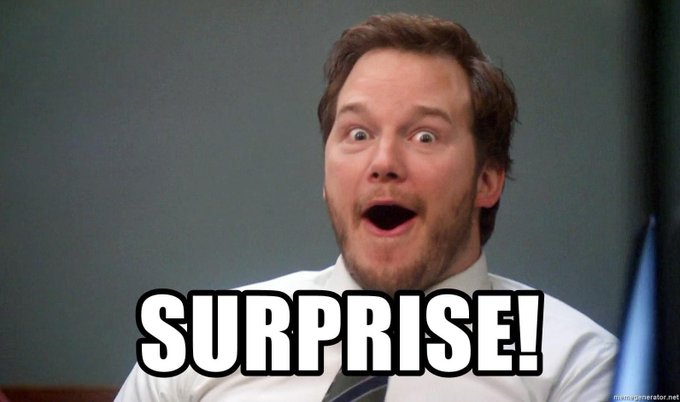

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("data/sample_submission.csv")

In [ ]:
sample.head()

laptop_ID  Price_in_euros
0        209          1949.1
1       1281           805.0
2       1168          1101.0
3       1231          1293.8
4       1020          1832.6

In [ ]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [ ]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,"Price_in_euros": predictions_submit})

In [ ]:
submission.head()

laptop_ID  Price_in_euros
0        209     2090.738525
1       1281     1451.760376
2       1168     2056.173340
3       1231     2088.066406
4       1020     2056.173340

In [ ]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [ ]:
chequeador(submission)

You're ready to submit!
